In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.size'] = 10
sns.set_style("darkgrid")

In [2]:
medical_df = pd.read_csv("../Linear Regression/medical_data.csv")

In [3]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
medical_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


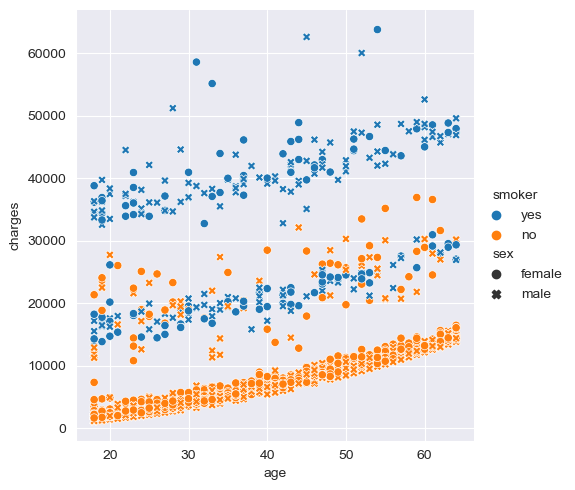

In [6]:
sns.relplot(data = medical_df, x="age", style="sex", hue="smoker", y="charges")

<Axes: xlabel='bmi', ylabel='Count'>

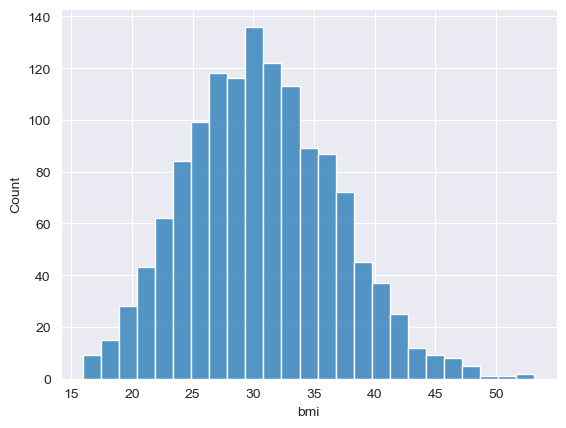

In [7]:
sns.histplot(data=medical_df, x="bmi")

C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_11068\3915081979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(medical_df.corr(), annot=True)


<Axes: >

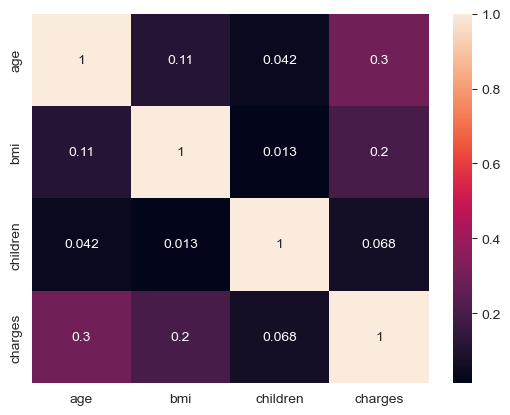

In [8]:
sns.heatmap(medical_df.corr(), annot=True)

In [9]:
smoker_values = {"no": 0, "yes": 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [10]:
medical_df.charges.corr(smoker_numeric)

0.7872514304984785

In [11]:
non_smoker_df = medical_df[medical_df.smoker == "no"].copy()
smoker_df = medical_df[medical_df.smoker == "yes"].copy()

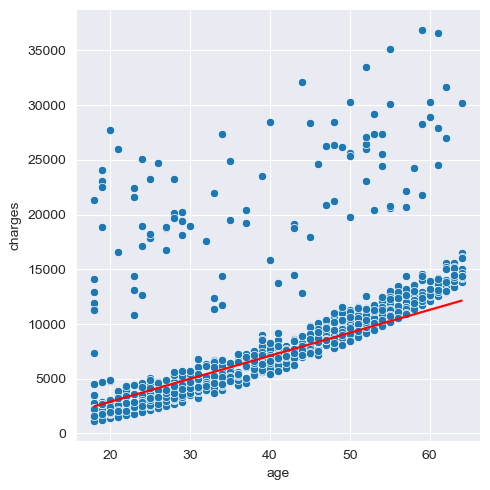

In [12]:
def estimate_charges(age, a, b):
    return a * age + b
def try_parameter(a, b):
    ages = non_smoker_df.age
    charges = non_smoker_df.charges
    estimated_charges = estimate_charges(ages, a, b)
    sns.relplot(non_smoker_df, x="age", y="charges")
    sns.lineplot(y=estimated_charges, x=ages, color="r")
    
try_parameter(210, -1300)

In [13]:
def rmse(target, prediction):
    return np.sqrt(np.mean(np.square(target-prediction)))

In [14]:
predictions = estimate_charges(non_smoker_df.age, 210, -1300)

In [15]:
rmse(non_smoker_df.age, predictions)

7530.062464168921

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [17]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges

In [18]:
model.fit(inputs, targets)

LinearRegression()

In [19]:
predictions = model.predict(inputs)

In [20]:
rmse(targets, predictions)

4662.505766636395

In [21]:
model.coef_, model.intercept_

(array([267.24891283]), -2091.4205565650827)

In [22]:
non_smoker_df[non_smoker_df.age == 21].charges


51       3579.82870
77       1532.46970
90       2026.97410
113      2404.73380
363      2597.77900
364      3180.51010
397     16586.49771
428      3167.45585
478      1534.30450
507      3077.09550
586      3861.20965
680      2585.26900
690      2104.11340
700      2020.55230
751      1906.35825
787      1917.31840
802      2103.08000
840      1526.31200
882      2585.85065
968      3279.86855
1019    26018.95052
1025     2020.17700
1072     1909.52745
1077     2102.26470
1292     1515.34490
1336     2007.94500
Name: charges, dtype: float64

In [23]:
model.predict([[23]])

C:\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4055.30443855])

In [24]:
sex_code = {"male": 0, "female": 1}
smoker_code = {"no": 0, "yes": 1}
non_smoker_df["sex_code"] = non_smoker_df.sex.map(sex_code)


In [25]:
non_smoker_df["smoker_code"] = non_smoker_df.smoker.map(smoker_code)

In [26]:
inputs, targets = non_smoker_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], non_smoker_df.charges
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rmse(targets, predictions)

4601.343101319802

In [27]:
cat_cols = non_smoker_df.columns[non_smoker_df.dtypes == "object"]
cat_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [28]:
non_smoker_df[cat_cols].nunique()

sex       2
smoker    1
region    4
dtype: int64

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
encoder = OneHotEncoder()
encoder.fit(non_smoker_df[["region"]])

OneHotEncoder()

In [31]:
encoder.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [32]:
enc_transform = encoder.transform(non_smoker_df[["region"]]).toarray()

In [33]:
non_smoker_df[encoder.categories_[0]] = enc_transform

In [34]:
non_smoker_df[encoder.categories_[0]]

,northeast,northwest,southeast,southwest
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
5,0.0,0.0,1.0,0.0
...,...,...,...,...
1332,0.0,0.0,0.0,1.0
1333,0.0,1.0,0.0,0.0
1334,1.0,0.0,0.0,0.0
1335,0.0,0.0,1.0,0.0


In [35]:
inputs, targets = non_smoker_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']+list(non_smoker_df[encoder.categories_[0]])], non_smoker_df.charges
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rmse(targets, predictions)

4573.074988795492

In [36]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code']+list(non_smoker_df[encoder.categories_[0]])
weights_df = pd.DataFrame({
    "feature": np.append(input_cols,1),
    "weight": np.append(model.coef_, model.intercept_)
})
weights_df


,feature,weight
0,age,2.644814e+02
1,bmi,1.898046e+01
2,children,5.874583e+02
3,smoker_code,5.684342e-14
4,sex_code,5.259705e+02
5,northeast,7.336830e+02
6,northwest,1.855543e+02
7,southeast,-2.583654e+02
8,southwest,-6.608719e+02
9,1,-3.466718e+03


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = non_smoker_df.select_dtypes(include=np.number).columns.tolist()

In [39]:
scaler.fit(non_smoker_df[['age','bmi','children']])

StandardScaler()

In [42]:
 scaled_inputs = scaler.transform(non_smoker_df[['age','bmi','children',]])

In [43]:
non_smoker_df[scaler.feature_names_in_.tolist()] = scaled_inputs

In [44]:
non_smoker_df.describe()

,age,bmi,children,charges,sex_code,smoker_code,northeast,northwest,southeast,southwest
count,1.064000e+03,1.064000e+03,1.064000e+03,1064.000000,1064.000000,1064.0,1064.000000,1064.000000,1064.000000,1064.000000
mean,9.015345e-17,8.681443e-17,6.678033e-18,8434.268298,0.514098,0.0,0.241541,0.250940,0.256579,0.250940
std,1.000470e+00,1.000470e+00,1.000470e+00,5993.781819,0.500036,0.0,0.428219,0.433758,0.436950,0.433758
min,-1.519191e+00,-2.432307e+00,-8.954158e-01,1121.873900,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,-8.976008e-01,-7.179802e-01,-8.954158e-01,3986.438700,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,4.366490e-02,-4.954995e-02,-7.410338e-02,7345.405300,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,8.961320e-01,6.255026e-01,7.472090e-01,11362.887050,1.000000,0.0,0.000000,1.000000,1.000000,1.000000
max,1.748599e+00,3.721390e+00,3.211146e+00,36910.608030,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [45]:
encoded_cols = list(non_smoker_df[encoder.categories_[0]])
inputs, targets = non_smoker_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']+encoded_cols], non_smoker_df.charges
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rmse(targets, predictions)

4573.074988795492

In [57]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code']+list(non_smoker_df[encoder.categories_[0]])
weights_df = pd.DataFrame({
    "feature": np.append(input_cols,1),
    "weight": np.append(model.coef_, model.intercept_)
})
weights_df.sort_values(by="weight", ascending=False)

,feature,weight
9,1,8.172221e+03
0,age,3.723050e+03
5,northeast,7.336830e+02
2,children,7.152677e+02
4,sex_code,5.259705e+02
6,northwest,1.855543e+02
1,bmi,1.146471e+02
3,smoker_code,1.136868e-13
7,southeast,-2.583654e+02
8,southwest,-6.608719e+02


In [61]:
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [66]:
model = LinearRegression().fit(inputs_train, targets_train)

In [68]:
predictions_train = model.predict(inputs_train)
rmse(targets_train, predictions_train)

4575.6199448067755

In [69]:
predictions_test = model.predict(inputs_test)
rmse(targets_test, predictions_test)

4572.3603794772525